In [1]:
!pip install stanfordnlp

    100% |████████████████████████████████| 143kB 3.7MB/s ta 0:00:01
    100% |████████████████████████████████| 1.2MB 9.8MB/s eta 0:00:01
    100% |████████████████████████████████| 27.2MB 1.2MB/s ta 0:00:011   42% |█████████████▌                  | 11.5MB 4.3MB/s eta 0:00:04    64% |████████████████████▊           | 17.6MB 6.1MB/s eta 0:00:02


In [4]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 2.7MB/s ta 0:00:01


In [7]:
import nltk
import string
import collections
import stanfordnlp
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
#import gensim

from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /Users/rudesh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/rudesh/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rudesh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rudesh/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/rudesh/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [64]:
paragraph = open('steve_jobs.txt', 'r').read()

paragraph

'I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.\n\nThe first story is about connecting the dots.\n\nI dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?\n\nIt started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night as

**Split the text into sentences**

In [10]:
sentences = nltk.sent_tokenize(paragraph)
for sent in sentences:
    print("Sentence:")
    print(sent)
    print()

Sentence:
I am honored to be with you today at your commencement from one of the finest universities in the world.

Sentence:
I never graduated from college.

Sentence:
Truth be told, this is the closest I’ve ever gotten to a college graduation.

Sentence:
Today I want to tell you three stories from my life.

Sentence:
That’s it.

Sentence:
No big deal.

Sentence:
Just three stories.

Sentence:
The first story is about connecting the dots.

Sentence:
I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit.

Sentence:
So why did I drop out?

Sentence:
It started before I was born.

Sentence:
My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption.

Sentence:
She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife.

Sentence:
Except that when I popped out they

**Split the text into words**

In [15]:
words = paragraph.split()

print('Split the paragraph into words and removed stops and commas')
print(words)

Split the paragraph into words and removed stops and commas
['I', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world.', 'I', 'never', 'graduated', 'from', 'college.', 'Truth', 'be', 'told,', 'this', 'is', 'the', 'closest', 'I’ve', 'ever', 'gotten', 'to', 'a', 'college', 'graduation.', 'Today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life.', 'That’s', 'it.', 'No', 'big', 'deal.', 'Just', 'three', 'stories.', 'The', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots.', 'I', 'dropped', 'out', 'of', 'Reed', 'College', 'after', 'the', 'first', '6', 'months,', 'but', 'then', 'stayed', 'around', 'as', 'a', 'drop-in', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'I', 'really', 'quit.', 'So', 'why', 'did', 'I', 'drop', 'out?', 'It', 'started', 'before', 'I', 'was', 'born.', 'My', 'biological', 'mother', 'was', 'a', 'young,', 'unwed', 'college

In [16]:
tokens = word_tokenize(paragraph)

print('Split the paragraph into words by using tokenize method')
print(tokens)

Split the paragraph into words by using tokenize method
['I', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', '.', 'I', 'never', 'graduated', 'from', 'college', '.', 'Truth', 'be', 'told', ',', 'this', 'is', 'the', 'closest', 'I', '’', 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', '.', 'Today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', '.', 'That', '’', 's', 'it', '.', 'No', 'big', 'deal', '.', 'Just', 'three', 'stories', '.', 'The', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', '.', 'I', 'dropped', 'out', 'of', 'Reed', 'College', 'after', 'the', 'first', '6', 'months', ',', 'but', 'then', 'stayed', 'around', 'as', 'a', 'drop-in', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'I', 'really', 'quit', '.', 'So', 'why', 'did', 'I', 'drop', 'out', '?', 'It', 'started', 'before', 'I', 'was', 'born', '.', 'My',

**Count the number of sentences, words and word types**

In [17]:
print('Total words:   ', len(paragraph.split()))
print('Total sentences:    ', paragraph.count('.'))

Total words:    2246
Total sentences:     142


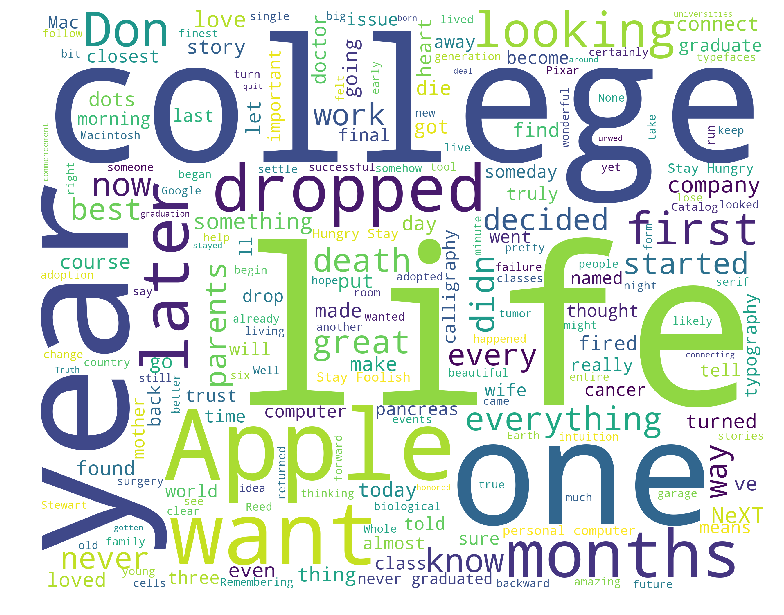

In [19]:
word_types = ' '.join(sentences)
wordcloud = WordCloud(background_color='white', width=2500, height=2000).generate(word_types)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Average length of the sentences and the average length of the words**

In [20]:
x = 0
for sent in sentences:
    words_count = sent.split()
    x += len(words_count)
        
print('Average length of a sentence: ', int(x/paragraph.count('.')))

Average length of a sentence:  15


In [21]:
print('Average length of a word', int((len(paragraph) - paragraph.count(' '))/len(paragraph.split())))

Average length of a word 4


**50 most frequent words in the document**

[('I', 93), ('the', 91), ('to', 71), ('and', 49), ('was', 48), ('a', 46), ('’', 43), ('of', 40), ('that', 38), ('it', 37), ('in', 33), ('you', 32), ('is', 29), ('my', 25), ('had', 22), ('out', 20), ('with', 19), ('t', 19), ('It', 18), ('me', 18), ('And', 18), ('for', 17), ('have', 17), ('all', 16), ('life', 15), ('be', 14), ('your', 14), ('as', 14), ('on', 14), ('what', 14), ('from', 13), ('college', 12), ('at', 11), ('so', 11), ('do', 11), ('one', 9), ('s', 9), ('about', 9), ('but', 9), ('very', 9), ('when', 9), ('would', 9), ('years', 9), ('Apple', 9), ('never', 8), ('this', 7), ('The', 7), ('dropped', 7), ('months', 7), ('they', 7)]


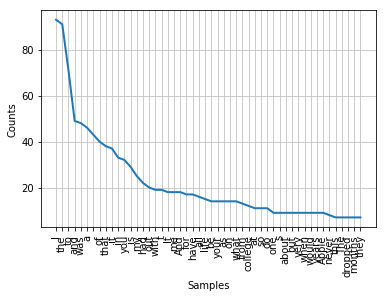

In [38]:
text = "".join([ch for ch in paragraph if ch not in string.punctuation])
tokens_dist = nltk.word_tokenize(text)

freq_dist = nltk.FreqDist(tokens_dist)
print(freq_dist.most_common(50))
freq_dist.plot(50)

**hapax legomena**

In [22]:
text_hapax = paragraph.lower()

#create Default dictionary 
word_count = collections.defaultdict(int)


#split text and update result dictionary
for h_word in text_hapax.split():
  if h_word: #ignore whitespace
    word_count[h_word] += 1


#list which save word which value is 1
hapax_words = list()
for hl_word, value in word_count.items():
  if value==1:
    hapax_words.append(hl_word)

print("hapax words:", hapax_words)
print()
print('Total hapax legomena: ', len(hapax_words))


hapax words: ['honored', 'commencement', 'universities', 'truth', 'told,', 'gotten', 'graduation.', 'stories', 'that’s', 'deal.', 'stories.', 'connecting', 'dots.', '6', 'stayed', 'around', 'drop-in', '18', 'quit.', 'why', 'out?', 'born.', 'unwed', 'student,', 'adoption.', 'strongly', 'graduates,', 'set', 'birth', 'lawyer', 'except', 'popped', 'girl.', 'parents,', 'waiting', 'list,', 'call', 'middle', 'asking:', '“we', 'unexpected', 'baby', 'boy;', 'him?”', 'said:', '“of', 'course.”', 'father', 'high', 'school.', 'refused', 'sign', 'adoption', 'papers.', 'relented', 'promised', '17', 'naively', 'chose', 'expensive', 'stanford,', 'working-class', 'savings', 'spent', 'tuition.', 'couldn’t', 'value', 'figure', 'spending', 'money', 'saved', 'ok.', 'scary', 'time,', 'decisions', 'made.', 'stop', 'taking', 'required', 'classes', 'interest', 'dropping', 'ones', 'interesting.', 'wasn’t', 'romantic.', 'dorm', 'room,', 'slept', 'floor', 'friends’', 'rooms,', 'coke', 'bottles', '5¢', 'deposits', 

**Stemming**

In [23]:
st_sentences = nltk.sent_tokenize(paragraph.lower())
stem_sentence = []
stemmer = PorterStemmer()

# Stemming
for i in range(len(st_sentences)):
    st_words = nltk.word_tokenize(st_sentences[i])
    st_words = [stemmer.stem(st_word) for st_word in st_words]
    st_sentences[i] = ' '.join(st_words)
    stem_sentence.append(st_sentences[i])
    print(st_words)

['i', 'am', 'honor', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commenc', 'from', 'one', 'of', 'the', 'finest', 'univers', 'in', 'the', 'world', '.']
['i', 'never', 'graduat', 'from', 'colleg', '.']
['truth', 'be', 'told', ',', 'thi', 'is', 'the', 'closest', 'i', '’', 've', 'ever', 'gotten', 'to', 'a', 'colleg', 'graduat', '.']
['today', 'i', 'want', 'to', 'tell', 'you', 'three', 'stori', 'from', 'my', 'life', '.']
['that', '’', 's', 'it', '.']
['no', 'big', 'deal', '.']
['just', 'three', 'stori', '.']
['the', 'first', 'stori', 'is', 'about', 'connect', 'the', 'dot', '.']
['i', 'drop', 'out', 'of', 'reed', 'colleg', 'after', 'the', 'first', '6', 'month', ',', 'but', 'then', 'stay', 'around', 'as', 'a', 'drop-in', 'for', 'anoth', '18', 'month', 'or', 'so', 'befor', 'i', 'realli', 'quit', '.']
['so', 'whi', 'did', 'i', 'drop', 'out', '?']
['it', 'start', 'befor', 'i', 'wa', 'born', '.']
['my', 'biolog', 'mother', 'wa', 'a', 'young', ',', 'unw', 'colleg', 'graduat', 'student', ','

[('the', 93), ('i', 73), ('to', 71), ('and', 51), ('wa', 48), ('a', 46), ('’', 43), ('it', 43), ('of', 41), ('that', 38), ('in', 33), ('you', 32), ('is', 29), ('my', 26), ('had', 22), ('.i', 20), ('out', 20), ('with', 19), ('t', 19), ('be', 18), ('me', 18), ('life', 17), ('for', 17), ('have', 17), ('all', 16), ('.and', 16), ('your', 14), ('colleg', 14), ('as', 14), ('on', 14), ('what', 14), ('from', 13), ('.it', 13), ('year', 12), ('at', 11), ('so', 11), ('do', 11), ('one', 10), ('drop', 10), ('want', 9), ('s', 9), ('about', 9), ('but', 9), ('veri', 9), ('when', 9), ('we', 9), ('would', 9), ('look', 9), ('love', 9), ('appl', 9)]


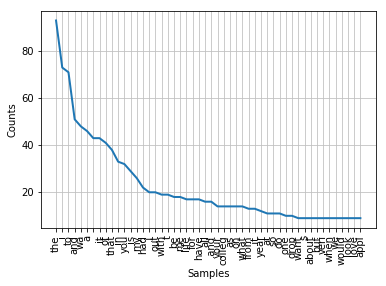

In [24]:
text = "".join([ch for ch in stem_sentence if ch not in string.punctuation])
tokens_dist = nltk.word_tokenize(text.replace(',', ''))

stem_dist = nltk.FreqDist(tokens_dist)
print(stem_dist.most_common(50))
stem_dist.plot(50)

**Stopwords**

In [25]:
english_stopwords = set(nltk.corpus.stopwords.words('english'))
print(english_stopwords)

{"haven't", 'nor', 'ours', 'hasn', "shouldn't", 'how', 're', 'be', 'no', 'doesn', 'her', 'it', 'all', 'm', 'ourselves', 't', "you'll", 'what', 'only', "needn't", 'in', 'does', "mightn't", 'theirs', 'on', 'own', 'why', 'above', 'out', 'herself', 'weren', 'itself', 'where', 'you', 'below', "she's", 'being', "won't", 'again', 'both', 'been', 'against', 'when', 'your', 'y', 'doing', 'an', 'with', 'during', 'than', "don't", 'did', 'is', 'before', 'shan', 'and', 'him', 'mustn', 'same', "you'd", 'through', 'but', 'myself', "wouldn't", 'hers', 'themselves', 'at', 'of', 'mightn', 'if', 'under', 'am', 'from', 'didn', 'needn', 'should', "doesn't", 'll', 'now', 'most', 'had', "mustn't", 'the', 'are', 'too', 'ain', 'haven', 'such', 'they', 'these', 'as', 'because', 'any', "didn't", "should've", 'its', 'more', 's', 'after', 'so', 'few', 'we', "hasn't", 'up', 'between', 'each', 'have', 'or', 'has', 'hadn', 'for', 'by', 'won', 'down', 'about', 'just', 'yours', 'himself', 'not', 'do', 'here', 'yourselv

In [29]:
stop_tokens = word_tokenize(paragraph.replace('.', '').replace(',', ''))
content_tokens = [token for token in stop_tokens if token.lower() not in english_stopwords]

In [30]:
print('Remaining words after removing stopwords: ')
print()
print(content_no_stop)

Remaining words after removing stopwords: 

['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college', 'Truth', 'told', 'closest', '’', 'ever', 'gotten', 'college', 'graduation', 'Today', 'want', 'tell', 'three', 'stories', 'life', '’', 'big', 'deal', 'three', 'stories', 'first', 'story', 'connecting', 'dots', 'dropped', 'Reed', 'College', 'first', '6', 'months', 'stayed', 'around', 'drop-in', 'another', '18', 'months', 'really', 'quit', 'drop', '?', 'started', 'born', 'biological', 'mother', 'young', 'unwed', 'college', 'graduate', 'student', 'decided', 'put', 'adoption', 'felt', 'strongly', 'adopted', 'college', 'graduates', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife', 'Except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl', 'parents', 'waiting', 'list', 'got', 'call', 'middle', 'night', 'asking', ':', '“', 'unexpected', 'baby', 'boy', ';', 'want', '?', '”', 'said', ':', '“', 'course', '”', 'biolog

In [31]:
freq_dist_no_stop = nltk.FreqDist(stop_tokens)

print('Remaining word types: ')
print(freq_dist_no_stop.most_common())

Remaining word types: 
[('I', 93), ('the', 91), ('to', 71), ('and', 49), ('was', 48), ('a', 46), ('’', 43), ('of', 40), ('that', 38), ('it', 37), ('in', 33), ('you', 32), ('is', 29), ('my', 25), ('had', 22), ('out', 20), ('with', 19), ('t', 19), ('It', 18), ('me', 18), ('And', 18), ('for', 17), ('have', 17), ('all', 16), ('life', 15), ('be', 14), ('your', 14), ('as', 14), ('on', 14), ('what', 14), ('from', 13), ('college', 12), ('at', 11), ('so', 11), ('do', 11), ('one', 9), ('s', 9), ('about', 9), ('but', 9), ('very', 9), ('when', 9), ('would', 9), ('years', 9), ('Apple', 9), ('never', 8), (':', 8), ('this', 7), ('The', 7), ('dropped', 7), ('months', 7), ('they', 7), ('looking', 7), ('we', 7), ('just', 7), ('want', 6), ('first', 6), ('then', 6), ('So', 6), ('by', 6), ('were', 6), ('“', 6), ('an', 6), ('”', 6), ('later', 6), ('only', 6), ('didn', 6), ('great', 6), ('know', 6), ('now', 6), ('Stay', 6), ('ever', 5), ('did', 5), ('started', 5), ('My', 5), ('decided', 5), ('everything', 5)

In [32]:
print('Remaining percentage % of remaining word tokens: ', 100 * (len(content_tokens)/len(paragraph.split())))

Remaining percentage % of remaining word tokens:  48.17453250222618


In [39]:
print('Remaining percentage % of remaining word types: ', 100 * (len(freq_dist_no_stop.most_common())/len(freq_dist.most_common())))

Remaining percentage % of remaining word types:  100.53547523427042


**POS Tagging**

In [75]:
# POS Tagging
pos_words = nltk.word_tokenize(paragraph)

tagged_words = nltk.pos_tag(pos_words)

# Tagged word paragraph
tags = []
word_tags = []
for tw in tagged_words:
    #print(tw)
    word_tags.append(tw[0]+"_"+tw[1])
    tags.append(tw[1])

pos_tagged_paragraph = ' '.join(word_tags)

In [46]:
#tags
word_tags

['I_PRP',
 'am_VBP',
 'honored_VBN',
 'to_TO',
 'be_VB',
 'with_IN',
 'you_PRP',
 'today_NN',
 'at_IN',
 'your_PRP$',
 'commencement_NN',
 'from_IN',
 'one_CD',
 'of_IN',
 'the_DT',
 'finest_JJS',
 'universities_NNS',
 'in_IN',
 'the_DT',
 'world_NN',
 '._.',
 'I_PRP',
 'never_RB',
 'graduated_VBD',
 'from_IN',
 'college_NN',
 '._.',
 'Truth_NN',
 'be_VB',
 'told_VBN',
 ',_,',
 'this_DT',
 'is_VBZ',
 'the_DT',
 'closest_JJS',
 'I_PRP',
 '’_VBP',
 've_JJ',
 'ever_RB',
 'gotten_VBN',
 'to_TO',
 'a_DT',
 'college_NN',
 'graduation_NN',
 '._.',
 'Today_NN',
 'I_PRP',
 'want_VBP',
 'to_TO',
 'tell_VB',
 'you_PRP',
 'three_CD',
 'stories_NNS',
 'from_IN',
 'my_PRP$',
 'life_NN',
 '._.',
 'That_DT',
 '’_VBZ',
 's_VBZ',
 'it_PRP',
 '._.',
 'No_DT',
 'big_JJ',
 'deal_NN',
 '._.',
 'Just_NNP',
 'three_CD',
 'stories_NNS',
 '._.',
 'The_DT',
 'first_JJ',
 'story_NN',
 'is_VBZ',
 'about_IN',
 'connecting_VBG',
 'the_DT',
 'dots_NNS',
 '._.',
 'I_PRP',
 'dropped_VBD',
 'out_IN',
 'of_IN',
 'Reed_NN

In [76]:
pos_tagged_paragraph

'I_PRP am_VBP honored_VBN to_TO be_VB with_IN you_PRP today_NN at_IN your_PRP$ commencement_NN from_IN one_CD of_IN the_DT finest_JJS universities_NNS in_IN the_DT world_NN ._. I_PRP never_RB graduated_VBD from_IN college_NN ._. Truth_NN be_VB told_VBN ,_, this_DT is_VBZ the_DT closest_JJS I_PRP ’_VBP ve_JJ ever_RB gotten_VBN to_TO a_DT college_NN graduation_NN ._. Today_NN I_PRP want_VBP to_TO tell_VB you_PRP three_CD stories_NNS from_IN my_PRP$ life_NN ._. That_DT ’_VBZ s_VBZ it_PRP ._. No_DT big_JJ deal_NN ._. Just_NNP three_CD stories_NNS ._. The_DT first_JJ story_NN is_VBZ about_IN connecting_VBG the_DT dots_NNS ._. I_PRP dropped_VBD out_IN of_IN Reed_NNP College_NNP after_IN the_DT first_JJ 6_CD months_NNS ,_, but_CC then_RB stayed_VBD around_RP as_IN a_DT drop-in_NN for_IN another_DT 18_CD months_NNS or_CC so_RB before_IN I_PRP really_RB quit_VBP ._. So_RB why_WRB did_VBD I_PRP drop_VB out_RP ?_. It_PRP started_VBD before_IN I_PRP was_VBD born_VBN ._. My_PRP$ biological_JJ mothe

[('NN', 306), ('IN', 255), ('PRP', 233), ('DT', 200), ('VBD', 174), ('JJ', 156), ('RB', 144), ('.', 143), ('VB', 108), (',', 100), ('NNP', 94), ('NNS', 89), ('CC', 85), ('TO', 71), ('VBP', 67), ('VBN', 58), ('PRP$', 54), ('VBZ', 44), ('VBG', 42), ('CD', 33), ('RP', 26), ('MD', 24), ('WP', 20), ('WRB', 17), ('WDT', 13), ('JJS', 10), (':', 10), ('RBR', 6), ('RBS', 5), ('PDT', 2), ('JJR', 2), ('EX', 2), ('$', 1)]


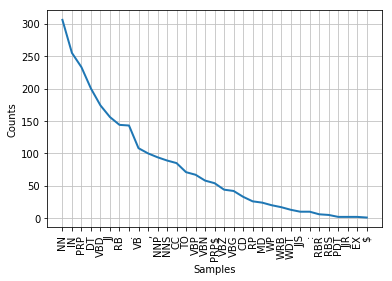

In [47]:
pos_dist = nltk.FreqDist(tags)
print(pos_dist.most_common())
pos_dist.plot()

**Lemmatization**

In [93]:
arr = []
for u in words:
    lemmatiser = WordNetLemmatizer()
    arr.append(lemmatiser.lemmatize(u, pos="n"))
    lem_paragraph = ' '.join(arr)

In [107]:
lem_paragraph
#arr

'I am honored to be with you today at your commencement from one of the finest university in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three story from my life. That’s it. No big deal. Just three stories. The first story is about connecting the dots. I dropped out of Reed College after the first 6 months, but then stayed around a a drop-in for another 18 month or so before I really quit. So why did I drop out? It started before I wa born. My biological mother wa a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything wa all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: “We have an 

In [99]:
for e in result:
    print(e)

['honored', 'today', 'commencement', 'one', 'finest', 'university', 'world']
['never', 'graduated', 'college']
['truth', 'told', 'closest', 'ever', 'gotten', 'college', 'graduation']
['today', 'want', 'tell', 'three', 'story', 'life']
[]
['big', 'deal']
['three', 'story']
['first', 'story', 'connecting', 'dot']
['dropped', 'reed', 'college', 'first', '6', 'month', 'stayed', 'around', 'dropin', 'another', '18', 'month', 'really', 'quit']
['drop']
['started', 'born']
['biological', 'mother', 'young', 'unwed', 'college', 'graduate', 'student', 'decided', 'put', 'adoption']
['felt', 'strongly', 'adopted', 'college', 'graduate', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife']
['except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl']
['parent', 'waiting', 'list', 'got', 'call', 'middle', 'night', 'asking', 'unexpected', 'baby', 'boy', 'want', 'said', 'biological', 'mother', 'later', 'found', 'mother', 'never', 'graduated', 'college', 'father', 'never', 'graduat

[('the', 91), ('I', 86), ('to', 71), ('a', 60), ('and', 49), ('wa', 47), ('of', 40), ('that', 38), ('in', 33), ('is', 29), ('it', 28), ('you', 27), ('my', 25), ('had', 22), ('with', 18), ('It', 18), ('for', 17), ('have', 17), ('And', 17), ('all', 16), ('your', 14), ('out', 14), ('what', 14), ('be', 13), ('from', 13), ('me', 12), ('on', 12), ('at', 11), ('so', 11), ('one', 10), ('year', 10), ('about', 9), ('but', 9), ('when', 9), ('do', 9), ('would', 9), ('never', 8), ('life.', 8), ('very', 8), ('college', 7), ('want', 7), ('it.', 7), ('The', 7), ('dropped', 7), ('they', 7), ('we', 7), ('just', 7), ('this', 6), ('first', 6), ('So', 6)]


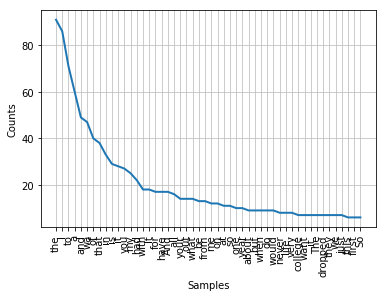

In [108]:
lemma_dist = nltk.FreqDist(arr)
print(lemma_dist.most_common(50))
lemma_dist.plot(50)